In [165]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.plotting import scatter_matrix

In [166]:
### Explore Data Analysis

In [167]:
data=pd.read_excel("TV-data.xlsx") # Upload the data

In [168]:
data.head() # Display the data

,series,network,Type,# Eps,Air Day,National Time,daypart,Run_time (min),Unique HHs,Total Hrs Viewed,Avg % Viewed
0,series19,network4,Broadcast,1,M,2011-04-04 21:00:00,prime,177.00,2006831,2.133483e+06,0.293022
1,series314,network5,Broadcast,3,M,2011-04-11 20:00:00,prime,121.00,4473165,4.094865e+06,0.397506
2,series314,network5,Broadcast,1,M,2011-04-18 20:00:00,prime,91.00,1221582,9.647431e+05,0.468066
3,series19,network4,Broadcast,1,S,2011-04-02 20:30:00,prime,178.00,1599092,1.767497e+06,0.313271
4,series83,network18,Broadcast,4,R,2011-04-21 20:00:00,prime,60.25,3829201,2.390739e+06,0.567840


In [169]:
data.shape # There are 3500 rows and 11 columns

(3500, 11)

In [170]:
data.ndim # Dimensions are two

2

In [171]:
data.duplicated().sum() # There is no duplicated rows

0

In [172]:
data.isnull().sum() # No missing/NaN values in the dataset

series              0
network             0
Type                0
# Eps               0
Air Day             0
National Time       0
daypart             0
Run_time (min)      0
Unique HHs          0
Total Hrs Viewed    0
Avg % Viewed        0
dtype: int64

In [173]:
data.dtypes # Check data types of each column

series               object
network              object
Type                 object
# Eps                 int64
Air Day              object
National Time        object
daypart              object
Run_time (min)      float64
Unique HHs            int64
Total Hrs Viewed    float64
Avg % Viewed        float64
dtype: object

In [174]:
data.describe() # Get basic statistics

,# Eps,Run_time (min),Unique HHs,Total Hrs Viewed,Avg % Viewed
count,3500.000000,3500.000000,3.500000e+03,3.500000e+03,3500.000000
mean,4.098857,65.611550,3.716375e+05,1.690007e+05,0.484845
std,5.664574,46.158333,7.660410e+05,4.385123e+05,0.165962
min,1.000000,2.000000,1.286500e+04,6.268061e+02,0.101760
25%,1.000000,30.000000,6.796900e+04,2.809981e+04,0.350000
50%,2.000000,60.000000,1.393025e+05,6.294667e+04,0.495075
75%,4.000000,90.000000,3.331402e+05,1.347992e+05,0.605277
max,28.000000,420.000000,1.478116e+07,1.155655e+07,0.983699


In [175]:
data.describe(include=['object']) 

,series,network,Type,Air Day,National Time,daypart
count,3500,3500,3500,3500,3500,3500
unique,1441,69,2,87,1039,7
top,series1062,network26,Cable,S,13:00:00,earlymorning
freq,37,241,3119,737,66,500


In [176]:
data_df= pd.DataFrame(data)# Create a DataFrame

In [177]:
### Visualization before Modeling

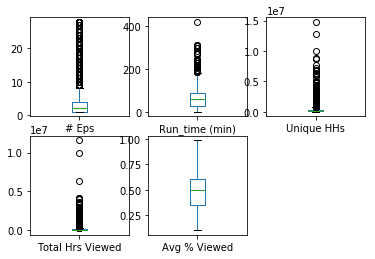

In [178]:
## Boxplot
data_df.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show() # Create boxplot to check outliers

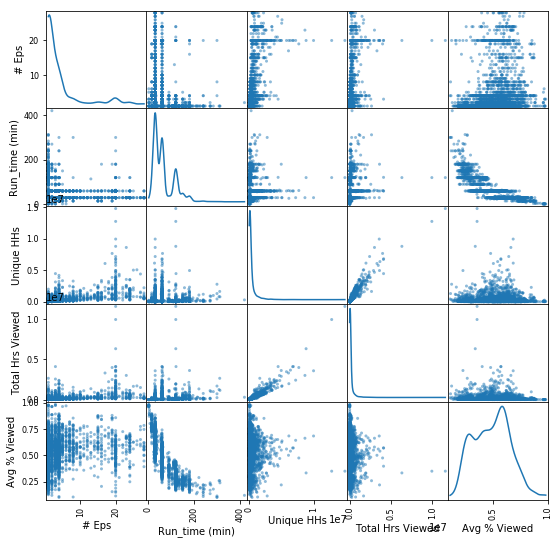

In [179]:
## Scatter Matrix plot 
scatter_matrix(data_df,figsize=(9, 9),diagonal='kde')
plt.show()

Some relationships such as strong linear correlations can be observed from above scatter matrix plot:
1) A positive correlation between 'Total Hrs Viewed' and 'Unique HHs'. 
2) A negative correlation between 'Avg % Viewed' and 'Run_time(mins)'. 

In [180]:
## Correlation Matrix and diagonal correlation matrix plot

# Compute the correlation matrix
nudata=data_df.drop(columns=['series','network','Type','Air Day','National Time','daypart'])
corr = nudata.corr()
corr

,# Eps,Run_time (min),Unique HHs,Total Hrs Viewed,Avg % Viewed
# Eps,1.000000,-0.249391,0.585050,0.427806,0.258269
Run_time (min),-0.249391,1.000000,-0.037626,0.089791,-0.827610
Unique HHs,0.585050,-0.037626,1.000000,0.936409,0.069290
Total Hrs Viewed,0.427806,0.089791,0.936409,1.000000,-0.022596
Avg % Viewed,0.258269,-0.827610,0.069290,-0.022596,1.000000


From this correlation matrix, it is confirmed that there is an obvious negative correlation between average % of the program viewed and its runing time, with a correaltion of -0.827610. There is a strong positive correlation +0.936409, between total hours viewed and the number of unique households tuned in to a given series within given time interval.

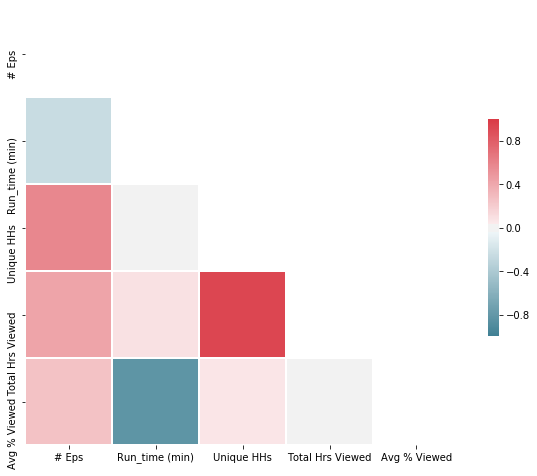

In [181]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

A diagonal correlation matrix could be plotted to vividly show the result.

In [182]:
### Data Modeling

In [183]:
## Data Preprocessing

# Normalization
cols_to_norm = ['# Eps','Run_time (min)','Unique HHs','Total Hrs Viewed','Avg % Viewed']
data_df[cols_to_norm] = StandardScaler().fit_transform(data_df[cols_to_norm])

In [184]:
data_df.head() # Show the dataframe after normalization

,series,network,Type,# Eps,Air Day,National Time,daypart,Run_time (min),Unique HHs,Total Hrs Viewed,Avg % Viewed
0,series19,network4,Broadcast,-0.547137,M,2011-04-04 21:00:00,prime,2.413527,2.134908,4.480520,-1.155990
1,series314,network5,Broadcast,-0.194015,M,2011-04-11 20:00:00,prime,1.200138,5.354953,8.953969,-0.526335
2,series314,network5,Broadcast,-0.547137,M,2011-04-18 20:00:00,prime,0.550108,1.109687,1.814900,-0.101115
3,series19,network4,Broadcast,-0.547137,S,2011-04-02 20:30:00,prime,2.435194,1.602564,3.645793,-1.033963
4,series83,network18,Broadcast,-0.017454,R,2011-04-21 20:00:00,prime,-0.116172,4.514194,5.067260,0.500151


In [185]:
cat_df=data_df.drop(['National Time'], axis=1)
# Drop Column 'National Time' since it can be replaced by 'Daypart' Column in the modeling

In [186]:
## Encoding labels using One-Hot Encoding

cat_df_onehot = cat_df.copy()
cat_df_onehot = pd.get_dummies(cat_df_onehot, 
                               columns=['series','network','Type','Air Day','daypart'], prefix = ['series','network','Type','Air Day','daypart'])
# convert each category value into a new column and assign a 1 or 0 value to the column

In [187]:
cat_df_onehot.head()

,# Eps,Run_time (min),Unique HHs,Total Hrs Viewed,Avg % Viewed,series_series1,series_series10,series_series100,series_series1000,series_series1001,...,Air Day_W S,Air Day_W S U,Air Day_W U,daypart_daytime,daypart_earlyfringe,daypart_earlymorning,daypart_latefringe,daypart_overnight,daypart_prime,daypart_primeaccess
0,-0.547137,2.413527,2.134908,4.480520,-1.155990,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.194015,1.200138,5.354953,8.953969,-0.526335,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.547137,0.550108,1.109687,1.814900,-0.101115,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.547137,2.435194,1.602564,3.645793,-1.033963,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.017454,-0.116172,4.514194,5.067260,0.500151,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [188]:
## Linear Regression Model
regression = LinearRegression()

Y=cat_df_onehot['Avg % Viewed']
X=cat_df_onehot.loc[:,cat_df_onehot.columns!='Avg % Viewed']

regression.fit(X,Y)

# Making Prediction
Y_pred = regression.predict(X)

In [189]:
# Model Evaluation with R-squared, MSE, RMSE
print(r2_score(Y,Y_pred))
print(mean_squared_error(Y,Y_pred))
print(np.sqrt(mean_squared_error(Y,Y_pred)))

0.9585318240827071
0.041468175917292946
0.20363736375550767


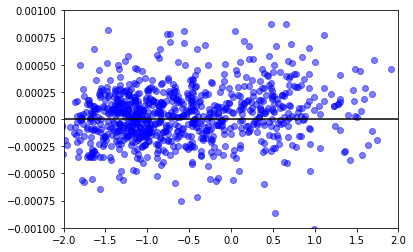

In [190]:
# Residual Plots
plt.scatter(regression.predict(X),regression.predict(X)-Y, c='b', alpha=0.5)
plt.ylim((-0.001,0.001))
plt.xlim((-2,2))
plt.hlines(y=0, xmin= -2, xmax=2)

In [191]:
# Get the corresponding coefficients to the features
cdf = pd.DataFrame(regression.coef_, X.columns, columns=['Coefficients'])

In [192]:
cdf.loc['Run_time (min)'] # coefficient for 'Run_time (min)' 

Coefficients   -0.613962
Name: Run_time (min), dtype: float64

Interpreation of the model coefficients:
A "unit" increase in the runtime is associated with a 0.613962 decrease in the average % of the program viewed.

In [193]:
# Isolate raw APV from runtime
cat_df['Adjusted APV']=cat_df['Avg % Viewed']-(-0.613962)*cat_df['Run_time (min)']

In [194]:
cat_df.head() # Show the data with new column 'Adjusted APV'

,series,network,Type,# Eps,Air Day,daypart,Run_time (min),Unique HHs,Total Hrs Viewed,Avg % Viewed,Adjusted APV
0,series19,network4,Broadcast,-0.547137,M,prime,2.413527,2.134908,4.480520,-1.155990,0.325823
1,series314,network5,Broadcast,-0.194015,M,prime,1.200138,5.354953,8.953969,-0.526335,0.210504
2,series314,network5,Broadcast,-0.547137,M,prime,0.550108,1.109687,1.814900,-0.101115,0.236631
3,series19,network4,Broadcast,-0.547137,S,prime,2.435194,1.602564,3.645793,-1.033963,0.461154
4,series83,network18,Broadcast,-0.017454,R,prime,-0.116172,4.514194,5.067260,0.500151,0.428826


In [195]:
cat_df['Adjusted APV'].describe()

count    3.500000e+03
mean     3.011559e-16
std      6.006746e-01
min     -1.546446e+00
25%     -4.323620e-01
50%     -7.407030e-02
75%      3.697359e-01
max      2.526146e+00
Name: Adjusted APV, dtype: float64

In [196]:
cat_df['Adjusted APV'].median() # Median of Adjusted APV 

-0.07407030162856632

In [197]:
## Engagement Index before aggregating to series which have the value of 1 as median
cat_df['Index before Aggregation']=cat_df['Adjusted APV']+(-cat_df['Adjusted APV'].median())+1
cat_df=pd.DataFrame(cat_df)
cat_df.head()

,series,network,Type,# Eps,Air Day,daypart,Run_time (min),Unique HHs,Total Hrs Viewed,Avg % Viewed,Adjusted APV,Index before Aggregation
0,series19,network4,Broadcast,-0.547137,M,prime,2.413527,2.134908,4.480520,-1.155990,0.325823,1.399894
1,series314,network5,Broadcast,-0.194015,M,prime,1.200138,5.354953,8.953969,-0.526335,0.210504,1.284574
2,series314,network5,Broadcast,-0.547137,M,prime,0.550108,1.109687,1.814900,-0.101115,0.236631,1.310701
3,series19,network4,Broadcast,-0.547137,S,prime,2.435194,1.602564,3.645793,-1.033963,0.461154,1.535224
4,series83,network18,Broadcast,-0.017454,R,prime,-0.116172,4.514194,5.067260,0.500151,0.428826,1.502896


In [198]:
def WeightedAvg(x):
    names={'WeightedAvg':(x['Adjusted APV']*x['Unique HHs']).sum()/x['Unique HHs'].sum()}
    return pd.Series(names,index=['WeightedAvg'])

# Aggregate by seires and calculate their weighted arithmetic mean of 'Avg % Viewed'
result=cat_df.groupby(['series']).apply(WeightedAvg)
result

,WeightedAvg
series,
series1,-0.533680
series10,-0.278475
series100,-0.488373
series1000,-0.198095
series1001,0.081832
series1002,0.331606
series1003,-0.216090
series1004,-0.119658
series1005,-0.465201


In [199]:
result['WeightedAvg'].describe() # Find 'WeightedAvg' median -0.251064 

count    1441.000000
mean       -0.202434
std         1.922669
min       -68.562342
25%        -0.523478
50%        -0.251064
75%         0.124769
max         8.713160
Name: WeightedAvg, dtype: float64

In [200]:
## Develop an Engagement Index which have the value of 1 for a program that performs exactly average
result['Engagement Index']=result['WeightedAvg']+(-result['WeightedAvg'].median())+1
result['Engagement Index']

series
series1       0.717384
series10      0.972590
series100     0.762692
series1000    1.052969
series1001    1.332896
series1002    1.582671
series1003    1.034974
series1004    1.131406
series1005    0.785864
series1006    1.133315
series1007    2.694768
series1008    0.931517
series1009    0.879418
series101     0.998926
series1010    1.025479
series1011    1.197134
series1012    1.465488
series1013    1.006982
series1014    1.539871
series1015    0.416846
series1016    0.843485
series1017    1.111125
series1018    1.195118
series1019    0.916690
series102     0.740134
series1020    1.709539
series1021    1.411017
series1022    1.512636
series1023    1.139228
series1024    0.459456
                ...   
series972     0.859504
series973     0.495468
series974     0.868752
series975     0.985695
series976     1.229538
series977     1.154256
series978     1.120859
series979     1.527624
series98      0.722055
series980     1.057155
series981     1.156523
series982     0.290511
seri

In [201]:
## Write Object to an Excel sheet

In [202]:
oridata=pd.read_excel("TV-data.xlsx") # Upload original dataset

In [203]:
# Add Index before aggregating to the original dataset
cat_df['Index before Aggregation'] = cat_df['Index before Aggregation'].astype(float)
oridata['Index before Aggregation']= cat_df['Index before Aggregation']
oridata.head()

,series,network,Type,# Eps,Air Day,National Time,daypart,Run_time (min),Unique HHs,Total Hrs Viewed,Avg % Viewed,Index before Aggregation
0,series19,network4,Broadcast,1,M,2011-04-04 21:00:00,prime,177.00,2006831,2.133483e+06,0.293022,1.399894
1,series314,network5,Broadcast,3,M,2011-04-11 20:00:00,prime,121.00,4473165,4.094865e+06,0.397506,1.284574
2,series314,network5,Broadcast,1,M,2011-04-18 20:00:00,prime,91.00,1221582,9.647431e+05,0.468066,1.310701
3,series19,network4,Broadcast,1,S,2011-04-02 20:30:00,prime,178.00,1599092,1.767497e+06,0.313271,1.535224
4,series83,network18,Broadcast,4,R,2011-04-21 20:00:00,prime,60.25,3829201,2.390739e+06,0.567840,1.502896


In [204]:
with pd.ExcelWriter('output.xlsx') as writer:
    result.to_excel(writer, sheet_name='Engagement Index')
    oridata.to_excel(writer, sheet_name='Index beofre aggregation')
    cdf.to_excel(writer, sheet_name='Coefficients')